Logistic growth model.

a) Solve the logistic equation by the finite-difference method, using the explicit Euler
integration method. Plot the solution obtained for different initial conditions x0, time steps Δt, and parameters r and K. Compare the result with figure 14.8. [Hint: Choose $Δt ≪ r^{−1}$. Why?]

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def logistic_equation(x, r, K):
    return r * x * (1 - x/K)

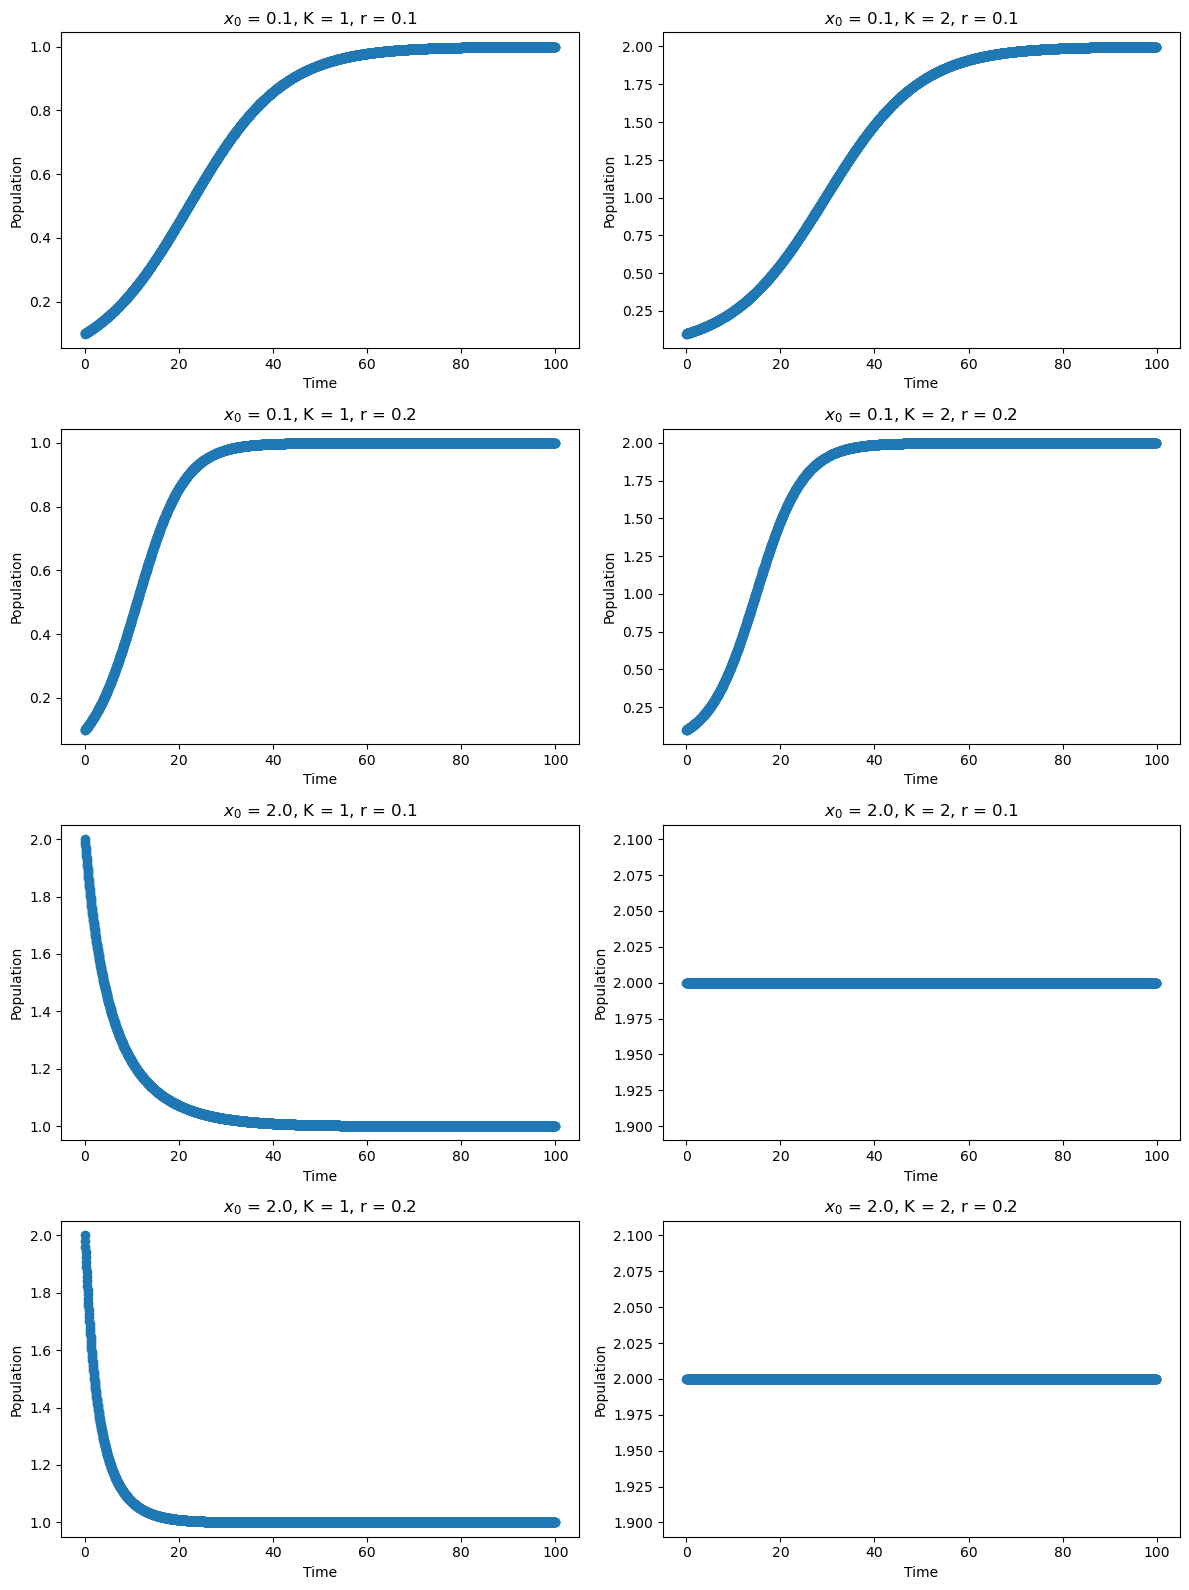

In [73]:
listX0 = [0.1, 2.0]
listK = [1, 2]
listR = [0.1, 0.2]
deltaT = 0.05
tMax = 100

fig, axs = plt.subplots(4, 2, figsize=(12, 16)) 
explicitList = []
for i, x0 in enumerate(listX0):
    for j, e in enumerate(listK):
        for h, r in enumerate(listR):
            t = np.arange(0, tMax, deltaT)

            x = np.zeros(len(t))
            x[0] = x0

            for p in range(len(t) - 1):
                x[p+1] = x[p] + deltaT * logistic_equation(x[p], r, e)

            axs[i*2+h, j].plot(t, x, 'o')
            axs[i*2+h, j].set_xlabel('Time')
            axs[i*2+h, j].set_ylabel('Population')
            axs[i*2+h, j].set_title(f'$x_0$ = {x0}, K = {e}, r = {r}')
            explicitList.append(x)
            

plt.tight_layout()
plt.show()

b) Solve it using the implicit Euler integration method. Plot the solutions obtained for different $x_0, r, K$, and $Δt$. Compare them with the solution for the explicit scheme and with figure 14.8.

[Hint: First, estimate $\tilde{x}_{n+1}$ by solving the nonlinear finite-difference algebraic equation  $\tilde{x}_{n+1} = x_n + r  \tilde{x}_{n+1} (1 − \tilde{x}_{n+1}/K$). Show that the estimate is then $$\tilde{x}_{n+1}=K\frac{-(1-r\,\Delta t)+\sqrt{(1-r\,\Delta t)^{2}+4\,r\,\Delta t{\frac{x_n} K}}}{2 r \Delta t}$$.]

In [61]:
def implicitEuler(K, r, dT, x0):
    return K*((-(1 - r * dT) + ((1 - r * dT) ** 2 + 4 * r * dT * (x0 / K)) ** 0.5) / (2 * r * dT))

In [ ]:
def analytical(K, r, dt, step, x0):
    return (K)/ (1 + (K/x0 - 1)*np.exp(-r(step-dt)))

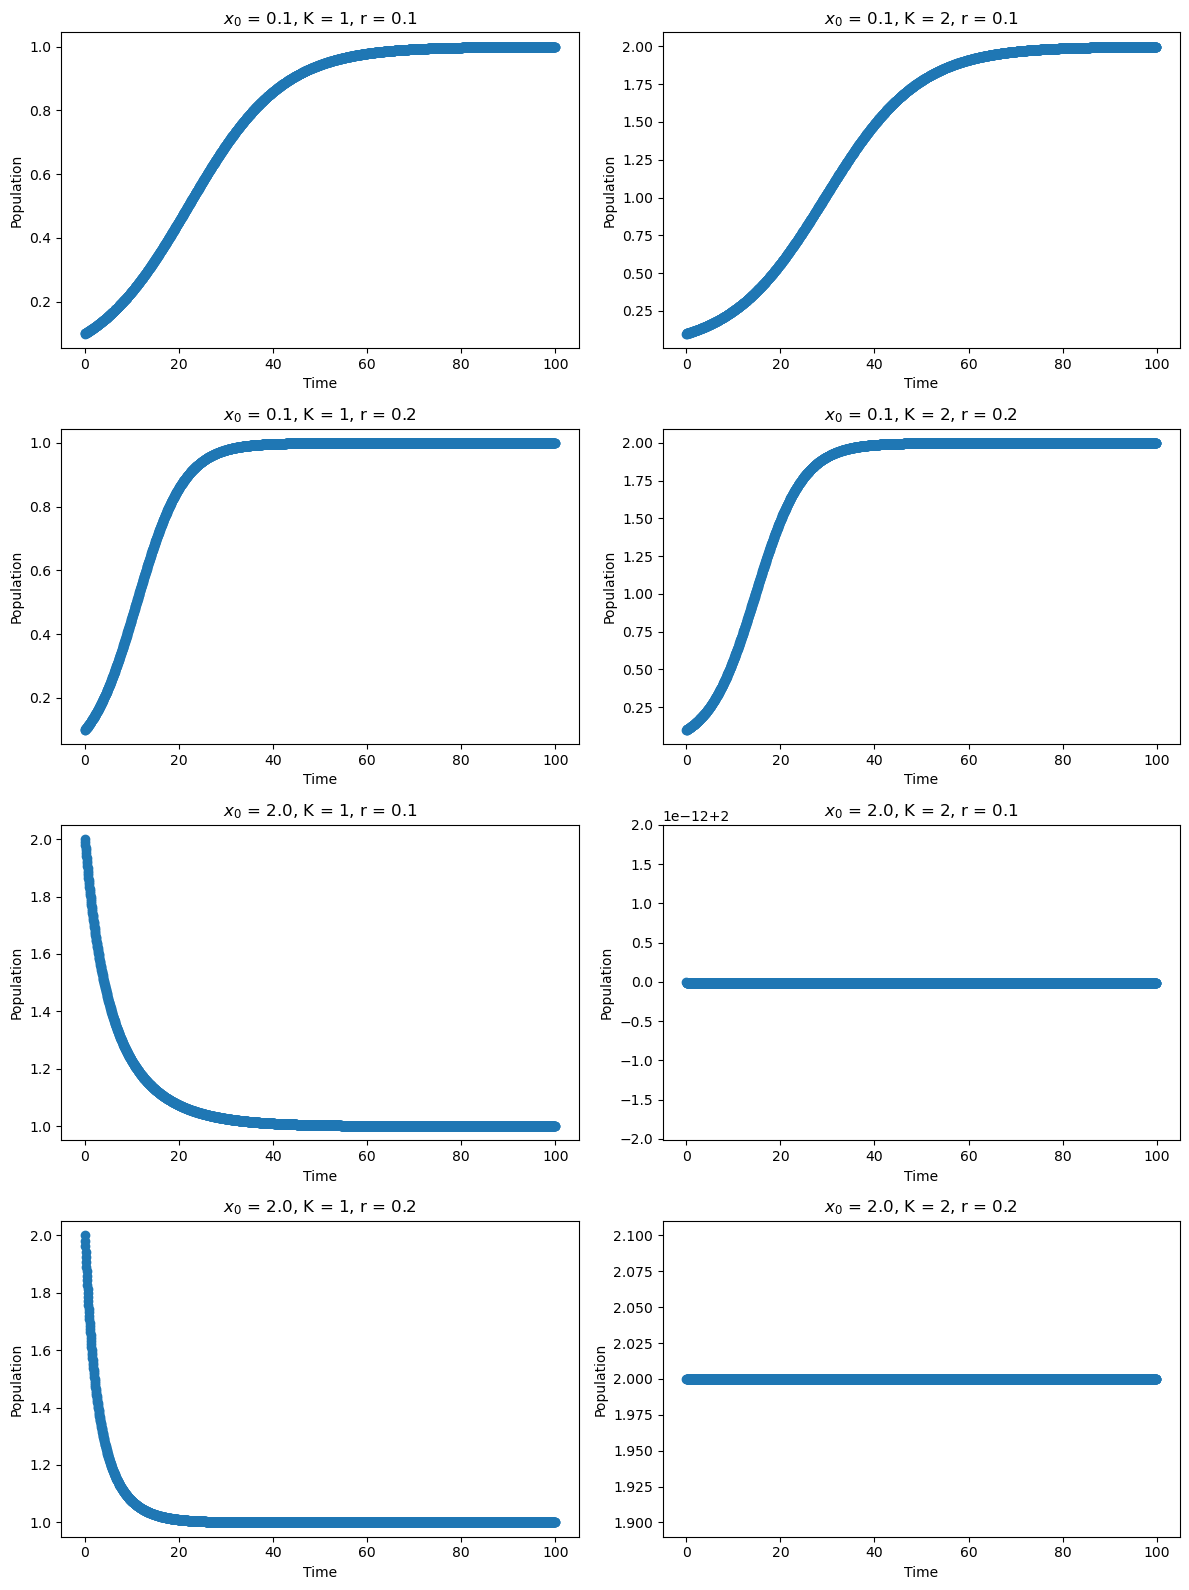

In [74]:
listX0 = [0.1, 2.0]
listK = [1, 2]
listR = [0.1, 0.2]
deltaT = 0.05
tMax = 100

fig, axs = plt.subplots(4, 2, figsize=(12, 16)) 
implicitList = []


for i, x0 in enumerate(listX0):
    for j, e in enumerate(listK):
        for h, r in enumerate(listR):
            t = np.arange(0, tMax, deltaT)

            x = np.zeros(len(t))
            x[0] = x0

            for p in range(len(t) - 1):
                x[p+1] = implicitEuler(e, r, deltaT, x[p])

            axs[i*2+h, j].plot(t, x, 'o')
            axs[i*2+h, j].set_xlabel('Time')
            axs[i*2+h, j].set_ylabel('Population')
            axs[i*2+h, j].set_title(f'$x_0$ = {x0}, K = {e}, r = {r}')
            implicitList.append(x)
            
plt.tight_layout()
plt.show()


c) Compare these numerical solutions with the exact solution. Which method is more appropriate? Show that the two methods are substantially equivalent in the majority of cases.
$$x(t)=\frac{K}{1 + \left(\frac{K}{x_0} - 1\right)e^{-r(t - t_0)}}$$

TypeError: 'float' object is not callable

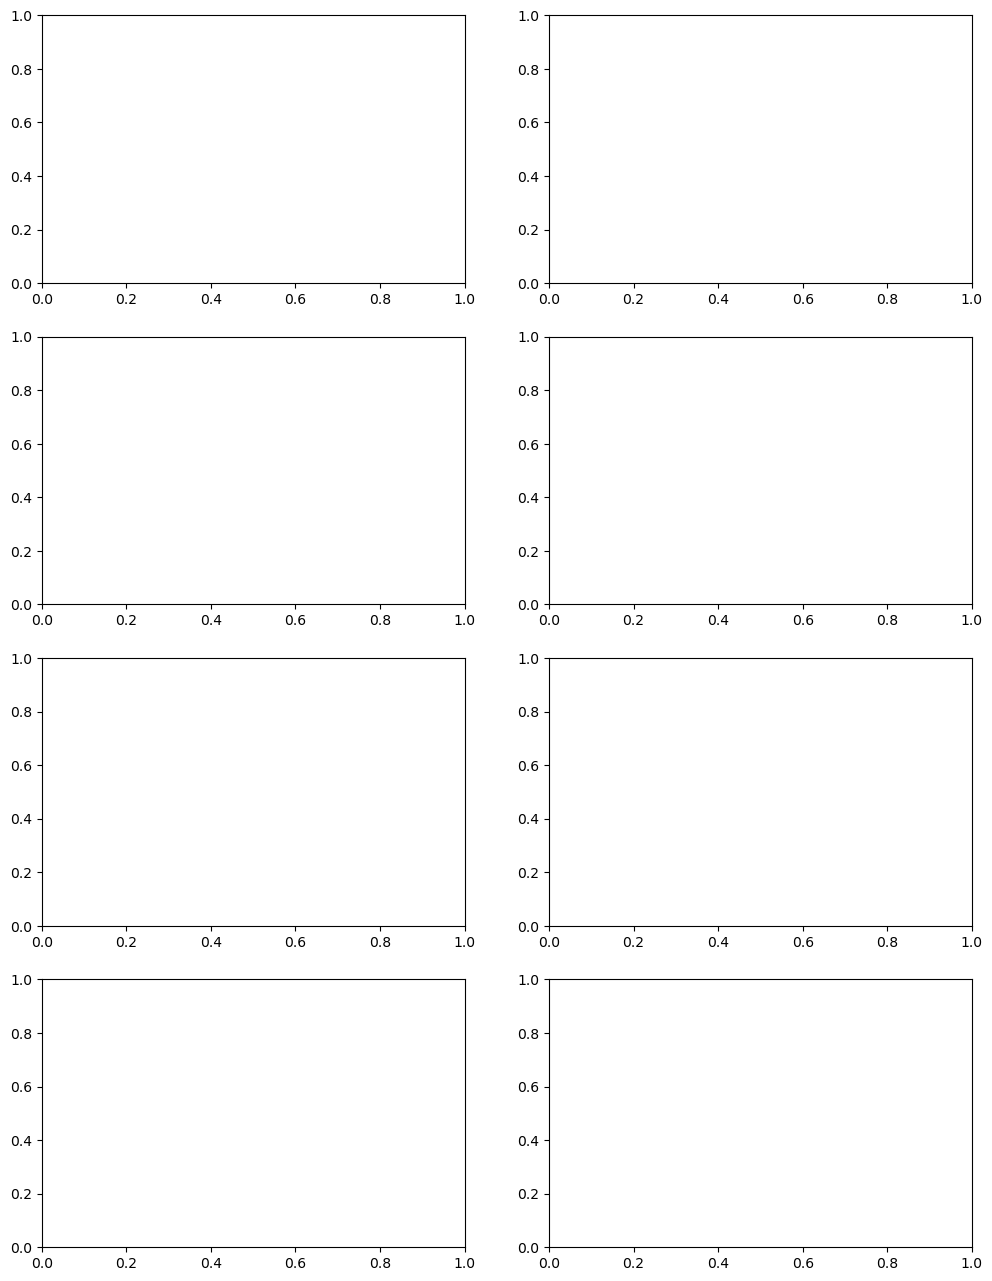

In [75]:
# now we compare the two methods for the same parameters using the exact formula 

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i, x0 in enumerate(listX0):
    for j, e in enumerate(listK):
        for h, r in enumerate(listR):
            t = np.arange(0, tMax, deltaT)

            x = np.zeros(len(t))
            x[0] = x0

            for p in range(len(t) - 1):
                x[p+1] = analytical(e, r, deltaT, p, x0)

            axs[i*2+h, j].plot(t, x, 'o')
            axs[i*2+h, j].set_xlabel('Time')
            axs[i*2+h, j].set_ylabel('Population')
            axs[i*2+h, j].set_title(f'$x_0$ = {x0}, K = {e}, r = {r}')

plt.tight_layout()
plt.show()